In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse

# Loading dataset

In [3]:
#No normalization is required
#Loading isolated pulses (not long traces)
df = pd.read_csv("../PeakDetection_test_Co60.csv", index_col = 0)

In [4]:
df

0  1  2  3  4  5  6  7  8  9  ...  1491  1492  1493  1494  1495  1496  \
50      0  0  0  1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
62      0 -1  0  0  0  0  0  0  0  0  ...    31    37    26    18    15    20   
74      0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     0     0   
82      0  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0     0   
94      0  0  0  1  0  0  0  0  0  0  ...    12     9     9    15    22    18   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
267316  0 -1  0  0  0  0  0  0  0 -1  ...     1     2     0     0     0     0   
267344  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267362  0  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0     0   
267432  0 -1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267484  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1497  1498  1499                                      peakLocations  
50         0     0     0  [6, 14, 18, 27, 33, 39, 42, 46, 55, 70, 88, 94...  
62        23    26    17  [4, 69, 108, 164, 197, 201, 237, 249, 287, 313...  
74         1     0     1  [-2, 5, 12, 15, 28, 31, 43, 51, 58, 66, 69, 75...  
82         0     0     0  [5, 17, 27, 35, 45, 52, 63, 68, 74, 81, 85, 92...  
94        11    10     6  [4, 11, 21, 32, 38, 43, 47, 54, 64, 73, 82, 95...  
...      ...   ...   ...                                                ...  
267316     0     0     0  [6, 29, 98, 107, 129, 174, 178, 199, 230, 345,...  
267344     0     0     0  [4, 13, 23, 37, 46, 57, 76, 102, 108, 123, 139...  
267362     0     0     0  [4, 42, 46, 56, 81, 138, 331, 498, 526, 729, 1...  
267432     0     0     0  [5, 175, 182, 185, 190, 197, 204, 208, 221, 22...  
267484     0     0     0  [4, 12, 23, 28, 40, 46, 55, 68, 73, 79, 84, 87...  

[20732 rows x 1501 columns]

# Peak detection and valid pulse filtering algorithms

In [5]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

# Filtering only valid typical pulses

### Remove baseline frist

### Apply pulse validation algorithm

In [6]:
dfPulses = df.copy()
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1491  1492  1493  1494  1495  1496  \
50      0  0  0  1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
62      0 -1  0  0  0  0  0  0  0  0  ...    31    37    26    18    15    20   
74      0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     0     0   
82      0  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0     0   
94      0  0  0  1  0  0  0  0  0  0  ...    12     9     9    15    22    18   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
267316  0 -1  0  0  0  0  0  0  0 -1  ...     1     2     0     0     0     0   
267344  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267362  0  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0     0   
267432  0 -1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267484  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1497  1498  1499                                      peakLocations  
50         0     0     0  [6, 14, 18, 27, 33, 39, 42, 46, 55, 70, 88, 94...  
62        23    26    17  [4, 69, 108, 164, 197, 201, 237, 249, 287, 313...  
74         1     0     1  [-2, 5, 12, 15, 28, 31, 43, 51, 58, 66, 69, 75...  
82         0     0     0  [5, 17, 27, 35, 45, 52, 63, 68, 74, 81, 85, 92...  
94        11    10     6  [4, 11, 21, 32, 38, 43, 47, 54, 64, 73, 82, 95...  
...      ...   ...   ...                                                ...  
267316     0     0     0  [6, 29, 98, 107, 129, 174, 178, 199, 230, 345,...  
267344     0     0     0  [4, 13, 23, 37, 46, 57, 76, 102, 108, 123, 139...  
267362     0     0     0  [4, 42, 46, 56, 81, 138, 331, 498, 526, 729, 1...  
267432     0     0     0  [5, 175, 182, 185, 190, 197, 204, 208, 221, 22...  
267484     0     0     0  [4, 12, 23, 28, 40, 46, 55, 68, 73, 79, 84, 87...  

[20732 rows x 1501 columns]

# ===== DEBUGGING TEST - DO NOT RUN =======

In [34]:
samplePulse = dfPulses.iloc[20]
samplePulse

0                                                                   6
1                                                                  12
2                                                                  14
3                                                                  11
4                                                                  10
                                          ...                        
1498                                                                2
1499                                                                2
peakLocations       [6, 13, 22, 28, 40, 54, 86, 108, 136, 158, 174...
arrivalTimes        [7, 16, 22, 34, 48, 80, 102, 130, 152, 168, 17...
timeBetweenPeaks    [7, 9, 6, 12, 14, 32, 22, 28, 22, 16, 9, 11, 1...
Name: 177, Length: 1503, dtype: object

<IPython.core.display.Javascript object>


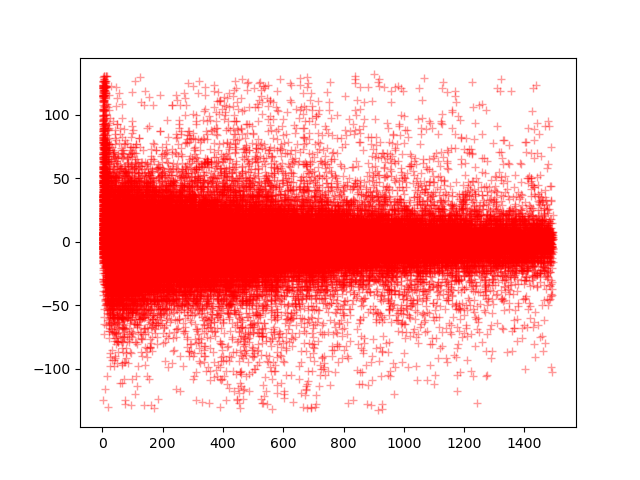

In [64]:
%matplotlib notebook
x = samplePulse.loc["peakLocations"]
y = samplePulse[x]

BASELINE_SHIFT = 2

for i in range(1000):
    samplePulse = dfPulses.iloc[i]
    x = samplePulse.loc["peakLocations"]
    y = []
    
    
    for j in range(len(x)):
        y.append(samplePulse[x[j]] - samplePulse[x[j - BASELINE_SHIFT]])
    
    plt.plot(x,y, 'r+', alpha = 0.4)

plt.show()

In [28]:
dfPulses

0   1   2   3   4   5   6   7   8   9  ...  1493  1494  1495  1496  \
7       41  30  30  25  15  22  41  63  91  91  ...     2     2     2     2   
10       1   2  44  34  30  37  53  70  71  88  ...     2     2     4     6   
11       6   3   2   4   1   3   2   3   2   3  ...     2     1     2     1   
12      11   6   2   5   2   2  11  18  14  11  ...     3     1     3     1   
40       2   2   2   3   1   4  14  20  14  12  ...     3     2     3     1   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
156991  26  19  14   9   7   8  18  31  29  21  ...     2     1     3     2   
156993  10   6   6   4   3   3   3  10  19  19  ...     1     2     1     2   
157015  58  36  31  18  11  12  21  26  33  39  ...     2     3     2     2   
157019   7   6   3   3   2   4   2   3   9  16  ...     3     2     2     2   
157021   3   2   1   3   1   3   3  15  27  28  ...     2     2     3     1   

        1497  1498  1499                                      peakLocations  \
7          2     3     2  [1, 8, 23, 26, 31, 39, 66, 69, 94, 117, 122, 1...   
10         9    22    37  [2, 11, 22, 32, 41, 51, 55, 73, 76, 80, 93, 10...   
11         2     2     2  [19, 50, 72, 114, 143, 173, 184, 239, 266, 350...   
12         2     1     2                                      [7, 195, 273]   
40         3     1     3  [7, 37, 161, 221, 267, 361, 373, 399, 408, 443...   
...      ...   ...   ...                                                ...   
156991     2     2     2  [1, 7, 13, 26, 31, 40, 49, 54, 57, 68, 74, 83,...   
156993     1     2     1  [13, 18, 22, 31, 42, 64, 99, 121, 139, 164, 17...   
157015     1     1     1  [1, 13, 21, 31, 39, 45, 57, 61, 71, 80, 91, 11...   
157019     3     1     2  [13, 65, 138, 154, 169, 185, 212, 253, 335, 36...   
157021     2     2     2  [9, 22, 29, 35, 195, 360, 370, 392, 403, 556, ...   

                                             arrivalTimes  \
7       [7, 22, 25, 30, 38, 65, 68, 93, 116, 121, 129,...   
10      [9, 20, 30, 39, 49, 53, 71, 74, 78, 91, 98, 11...   
11      [31, 53, 95, 124, 154, 165, 220, 247, 331, 367...   
12                                             [188, 266]   
40      [30, 154, 214, 260, 354, 366, 392, 401, 436, 4...   
...                                                   ...   
156991  [6, 12, 25, 30, 39, 48, 53, 56, 67, 73, 82, 98...   
156993  [5, 9, 18, 29, 51, 86, 108, 126, 151, 160, 196...   
157015  [12, 20, 30, 38, 44, 56, 60, 70, 79, 90, 111, ...   
157019  [52, 125, 141, 156, 172, 199, 240, 322, 350, 3...   
157021  [13, 20, 26, 186, 351, 361, 383, 394, 547, 640...   

                                         timeBetweenPeaks  
7       [7, 15, 3, 5, 8, 27, 3, 25, 23, 5, 8, 7, 17, 6...  
10      [9, 11, 10, 9, 10, 4, 18, 3, 4, 13, 7, 15, 8, ...  
11      [31, 22, 42, 29, 30, 11, 55, 27, 84, 36, 18, 5...  
12                                              [188, 78]  
40      [30, 124, 60, 46, 94, 12, 26, 9, 35, 28, 154, ...  
...                                                   ...  
156991  [6, 6, 13, 5, 9, 9, 5, 3, 11, 6, 9, 16, 5, 9, ...  
156993  [5, 4, 9, 11, 22, 35, 22, 18, 25, 9, 36, 46, 8...  
157015  [12, 8, 10, 8, 6, 12, 4, 10, 9, 11, 21, 8, 16,...  
157019  [52, 73, 16, 15, 16, 27, 41, 82, 28, 15, 17, 2...  
157021  [13, 7, 6, 160, 165, 10, 22, 11, 153, 93, 7, 1...  

[23979 rows x 1503 columns]

In [26]:
%matplotlib notebook
dfPulses.iloc[1000:1010,:].T.plot()
plt.show()

TypeError: no numeric data to plot

In [213]:
import random
randPulse = random.randrange(len(df))
randPulse

1189

<IPython.core.display.Javascript object>


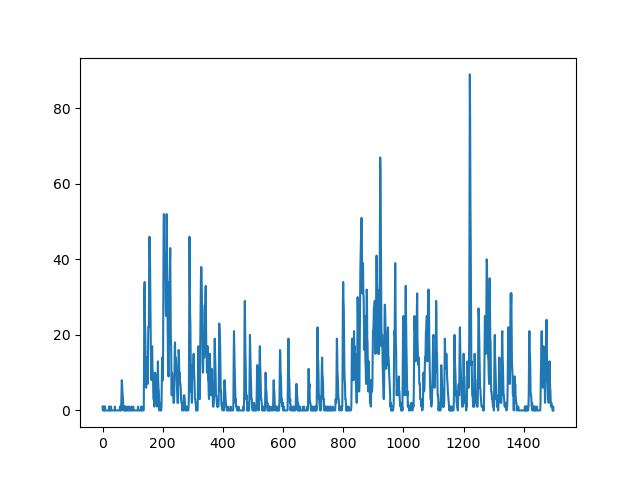

In [214]:
%matplotlib notebook
sample = df.iloc[randPulse,:PMT_PULSE_LENGTH]
sample.plot()
plt.show()
# print("Valid: "+ str(validPulse(sample, 5, 10, 200, 1.25)))

# ===== DEBUGGING ENDS HERE :) =======

# Peaks sequence detection

### Time between first and Nth peaks

In [7]:
def relativeArrivalTimes(x):
    deltaList = []
    for i in range(len(x) - 1):
        deltaList.append(x[i + 1] - x[0]) #Relative time respect to first peak
    
    return deltaList

### Time between successive peaks

In [8]:
def peaksStrToList(currentStrList):
    if type(currentStrList) == str:
        return np.array(currentStrList.replace("[", "").replace("]", "").replace("\n", "").split(",")).astype(int).tolist()
    return currentStrList

In [9]:
def timeBetweenPeaks(x):
    deltaList = []
    for i in range(len(x) - 1):
        deltaList.append(x[i + 1] - x[i]) #Relative time respect to first peak
    
    return deltaList

In [10]:
#Cleaning str-like characters from imported CSV data
dfPulses["peakLocations"] = dfPulses.iloc[:,-1].apply(peaksStrToList)
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1491  1492  1493  1494  1495  1496  \
50      0  0  0  1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
62      0 -1  0  0  0  0  0  0  0  0  ...    31    37    26    18    15    20   
74      0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     0     0   
82      0  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0     0   
94      0  0  0  1  0  0  0  0  0  0  ...    12     9     9    15    22    18   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
267316  0 -1  0  0  0  0  0  0  0 -1  ...     1     2     0     0     0     0   
267344  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267362  0  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0     0   
267432  0 -1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267484  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1497  1498  1499                                      peakLocations  
50         0     0     0  [6, 14, 18, 27, 33, 39, 42, 46, 55, 70, 88, 94...  
62        23    26    17  [4, 69, 108, 164, 197, 201, 237, 249, 287, 313...  
74         1     0     1  [-2, 5, 12, 15, 28, 31, 43, 51, 58, 66, 69, 75...  
82         0     0     0  [5, 17, 27, 35, 45, 52, 63, 68, 74, 81, 85, 92...  
94        11    10     6  [4, 11, 21, 32, 38, 43, 47, 54, 64, 73, 82, 95...  
...      ...   ...   ...                                                ...  
267316     0     0     0  [6, 29, 98, 107, 129, 174, 178, 199, 230, 345,...  
267344     0     0     0  [4, 13, 23, 37, 46, 57, 76, 102, 108, 123, 139...  
267362     0     0     0  [4, 42, 46, 56, 81, 138, 331, 498, 526, 729, 1...  
267432     0     0     0  [5, 175, 182, 185, 190, 197, 204, 208, 221, 22...  
267484     0     0     0  [4, 12, 23, 28, 40, 46, 55, 68, 73, 79, 84, 87...  

[20732 rows x 1501 columns]

In [13]:
dfPulses["arrivalTimes"] = dfPulses["peakLocations"].apply(relativeArrivalTimes)
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1493  1494  1495  1496  1497  1498  \
50      0  0  0  1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
62      0 -1  0  0  0  0  0  0  0  0  ...    26    18    15    20    23    26   
74      0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     1     0   
82      0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
94      0  0  0  1  0  0  0  0  0  0  ...     9    15    22    18    11    10   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
267316  0 -1  0  0  0  0  0  0  0 -1  ...     0     0     0     0     0     0   
267344  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267362  0  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0     0   
267432  0 -1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267484  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1499                                      peakLocations  \
50         0  [6, 14, 18, 27, 33, 39, 42, 46, 55, 70, 88, 94...   
62        17  [4, 69, 108, 164, 197, 201, 237, 249, 287, 313...   
74         1  [-2, 5, 12, 15, 28, 31, 43, 51, 58, 66, 69, 75...   
82         0  [5, 17, 27, 35, 45, 52, 63, 68, 74, 81, 85, 92...   
94         6  [4, 11, 21, 32, 38, 43, 47, 54, 64, 73, 82, 95...   
...      ...                                                ...   
267316     0  [6, 29, 98, 107, 129, 174, 178, 199, 230, 345,...   
267344     0  [4, 13, 23, 37, 46, 57, 76, 102, 108, 123, 139...   
267362     0  [4, 42, 46, 56, 81, 138, 331, 498, 526, 729, 1...   
267432     0  [5, 175, 182, 185, 190, 197, 204, 208, 221, 22...   
267484     0  [4, 12, 23, 28, 40, 46, 55, 68, 73, 79, 84, 87...   

                                         timeBetweenPeaks  \
50      [8, 4, 9, 6, 6, 3, 4, 9, 15, 18, 6, 11, 12, 4,...   
62      [65, 39, 56, 33, 4, 36, 12, 38, 26, 94, 13, 10...   
74      [7, 7, 3, 13, 3, 12, 8, 7, 8, 3, 6, 20, 8, 7, ...   
82      [12, 10, 8, 10, 7, 11, 5, 6, 7, 4, 7, 7, 11, 8...   
94      [7, 10, 11, 6, 5, 4, 7, 10, 9, 9, 13, 14, 4, 6...   
...                                                   ...   
267316  [23, 69, 9, 22, 45, 4, 21, 31, 115, 4, 24, 13,...   
267344  [9, 10, 14, 9, 11, 19, 26, 6, 15, 16, 38, 16, ...   
267362   [38, 4, 10, 25, 57, 193, 167, 28, 203, 327, 158]   
267432  [170, 7, 3, 5, 7, 7, 4, 13, 6, 8, 16, 13, 9, 6...   
267484  [8, 11, 5, 12, 6, 9, 13, 5, 6, 5, 3, 17, 18, 8...   

                                             arrivalTimes  
50      [8, 12, 21, 27, 33, 36, 40, 49, 64, 82, 88, 99...  
62      [65, 104, 160, 193, 197, 233, 245, 283, 309, 4...  
74      [7, 14, 17, 30, 33, 45, 53, 60, 68, 71, 77, 97...  
82      [12, 22, 30, 40, 47, 58, 63, 69, 76, 80, 87, 9...  
94      [7, 17, 28, 34, 39, 43, 50, 60, 69, 78, 91, 10...  
...                                                   ...  
267316  [23, 92, 101, 123, 168, 172, 193, 224, 339, 34...  
267344  [9, 19, 33, 42, 53, 72, 98, 104, 119, 135, 173...  
267362  [38, 42, 52, 77, 134, 327, 494, 522, 725, 1052...  
267432  [170, 177, 180, 185, 192, 199, 203, 216, 222, ...  
267484  [8, 19, 24, 36, 42, 51, 64, 69, 75, 80, 83, 10...  

[20732 rows x 1503 columns]

In [14]:
dfPulses["timeBetweenPeaks"] = dfPulses["peakLocations"].apply(timeBetweenPeaks)
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1493  1494  1495  1496  1497  1498  \
50      0  0  0  1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
62      0 -1  0  0  0  0  0  0  0  0  ...    26    18    15    20    23    26   
74      0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     1     0   
82      0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
94      0  0  0  1  0  0  0  0  0  0  ...     9    15    22    18    11    10   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
267316  0 -1  0  0  0  0  0  0  0 -1  ...     0     0     0     0     0     0   
267344  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267362  0  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0     0   
267432  0 -1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
267484  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1499                                      peakLocations  \
50         0  [6, 14, 18, 27, 33, 39, 42, 46, 55, 70, 88, 94...   
62        17  [4, 69, 108, 164, 197, 201, 237, 249, 287, 313...   
74         1  [-2, 5, 12, 15, 28, 31, 43, 51, 58, 66, 69, 75...   
82         0  [5, 17, 27, 35, 45, 52, 63, 68, 74, 81, 85, 92...   
94         6  [4, 11, 21, 32, 38, 43, 47, 54, 64, 73, 82, 95...   
...      ...                                                ...   
267316     0  [6, 29, 98, 107, 129, 174, 178, 199, 230, 345,...   
267344     0  [4, 13, 23, 37, 46, 57, 76, 102, 108, 123, 139...   
267362     0  [4, 42, 46, 56, 81, 138, 331, 498, 526, 729, 1...   
267432     0  [5, 175, 182, 185, 190, 197, 204, 208, 221, 22...   
267484     0  [4, 12, 23, 28, 40, 46, 55, 68, 73, 79, 84, 87...   

                                         timeBetweenPeaks  \
50      [8, 4, 9, 6, 6, 3, 4, 9, 15, 18, 6, 11, 12, 4,...   
62      [65, 39, 56, 33, 4, 36, 12, 38, 26, 94, 13, 10...   
74      [7, 7, 3, 13, 3, 12, 8, 7, 8, 3, 6, 20, 8, 7, ...   
82      [12, 10, 8, 10, 7, 11, 5, 6, 7, 4, 7, 7, 11, 8...   
94      [7, 10, 11, 6, 5, 4, 7, 10, 9, 9, 13, 14, 4, 6...   
...                                                   ...   
267316  [23, 69, 9, 22, 45, 4, 21, 31, 115, 4, 24, 13,...   
267344  [9, 10, 14, 9, 11, 19, 26, 6, 15, 16, 38, 16, ...   
267362   [38, 4, 10, 25, 57, 193, 167, 28, 203, 327, 158]   
267432  [170, 7, 3, 5, 7, 7, 4, 13, 6, 8, 16, 13, 9, 6...   
267484  [8, 11, 5, 12, 6, 9, 13, 5, 6, 5, 3, 17, 18, 8...   

                                             arrivalTimes  
50      [8, 12, 21, 27, 33, 36, 40, 49, 64, 82, 88, 99...  
62      [65, 104, 160, 193, 197, 233, 245, 283, 309, 4...  
74      [7, 14, 17, 30, 33, 45, 53, 60, 68, 71, 77, 97...  
82      [12, 22, 30, 40, 47, 58, 63, 69, 76, 80, 87, 9...  
94      [7, 17, 28, 34, 39, 43, 50, 60, 69, 78, 91, 10...  
...                                                   ...  
267316  [23, 92, 101, 123, 168, 172, 193, 224, 339, 34...  
267344  [9, 19, 33, 42, 53, 72, 98, 104, 119, 135, 173...  
267362  [38, 42, 52, 77, 134, 327, 494, 522, 725, 1052...  
267432  [170, 177, 180, 185, 192, 199, 203, 216, 222, ...  
267484  [8, 19, 24, 36, 42, 51, 64, 69, 75, 80, 83, 10...  

[20732 rows x 1503 columns]

# Filtering by energies

In [134]:
dfAreas = pd.read_csv("../PeakDetection_test_Co60_Areas.csv", index_col = 0)
dfAreas

Co60
50       9323
62       6910
74       5504
82      12216
94      16741
...       ...
267316   1990
267344   2648
267362    978
267432  13034
267484  18357

[20732 rows x 1 columns]

In [135]:
dfPulses = pd.concat([dfPulses, dfAreas], axis = 1)

In [143]:
upperEnergy = 32e3
lowerEnergy = 28e3
dfPulsesFiltered = dfPulses.loc[((dfPulses["Co60"] > lowerEnergy) & (dfPulses["Co60"] < upperEnergy))]
dfPulsesFiltered

0  1  2  3  4  5  6  7  8  9  ...  1494  1495  1496  1497  1498  1499  \
248     0  0  0  0  0  0  0  0  0  0  ...     6     5     3     2     1     1   
3454    0  0  0  0  0  0  0  0  0  0  ...     2     1     1     1     0     0   
8788    0  0  0  0  1  0  1  0  0  0  ...     0     0     0     1     0     0   
12036   0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
13601   0  0  0  0  0  0  0  0  0  0  ...    13     8     7     5     3     1   
14626   0  0  0  0  0  0  0  0  0  0  ...     0     1    12    18    12     9   
24641   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
25795   0  0  0  0  1  0  0  0  0  0  ...    13     9     6     6     5     3   
25844   0  1  0  0  0  0  0  0  0  0  ...     2     2     3     3     3     2   
27377   0  0  0  1  0  0  0  0  0  0  ...    24    14    10     8     4     2   
38006   0  0  0  0  0  0  1  0  0  0  ...     8     5     5     3     1     2   
42132   0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
44849   0  0  0  0  0  0  0  0  0  0  ...     1     2     6     9    14    17   
69334   0  0  0  1  0  0  0  0  1  0  ...     0     0     0     1     1     0   
69823   0  0  0  0  0  0  0  0  0  0  ...     0     1     0     0     0     1   
70718   0  0  0  1  0  0  0  0  0  0  ...     1     2     2     1     0     1   
72921   0  0  0  0  0  0  0  0  0  0  ...    13     8     7     5     2     2   
72988   0  0  0  0  0  0  0  0  0  1  ...     0     0     0     0     0     0   
80077   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
84811   0  0  0  0  0  0  0  0  0  0  ...    11     5     5     3     2     3   
88290   0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     0     0   
95952   0  0  0  0  0  0  1  0  1  0  ...     1     0     0     0     0     0   
101785  0  0  0  0  0  0  0  0  0  0  ...     2    13    21    16    13    12   
103838  0  0  1  0  1  0  0  0  0  0  ...     0     0     0     0     1     0   
111297  0  0  0  0  0  0  0  1  0  0  ...     0     0     0     0     1     0   
126649  0  1  0  0  0  0  0  0  0  0  ...    15    17     9     4     4     5   
133372  0  0  0  0  0  0  0  0  0  0  ...     5     3     3    14    20    16   
146267  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
153894  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
154069  0  0  0  0  1  0  0  0  0  0  ...    12    15    11     7     6     4   
172790  0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
182612  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
185015  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
192518  0  0  0 -1  0  0  0  0  0  0  ...     0     0     0     0     0     0   
194121  0  0  0  0  0  0  1  1  0  0  ...     8     8     5     2     2     2   
207721  0  0  0  0  0  0  0  0  0  0  ...     2     3     1     0     2     0   
225882  0  0  0  0  0  0  0  0  0  0  ...     0     1     0     0     0     0   
227059  1  0  0  0  0  0  0  0  0  0  ...     9     6     4     3     2     1   
231440  1  0  0  0  0  0  0  0  0  0  ...     5     4     2     2     2     1   
242343  0  0  0  0  0  0 -1  0  0  0  ...     2     1     1     6    12    11   

                                            peakLocations  \
248     [139, 150, 161, 164, 172, 179, 189, 196, 200, ...   
3454    [7, 18, 21, 27, 33, 43, 52, 60, 64, 72, 83, 87...   
8788    [4, 7, 12, 21, 29, 35, 43, 59, 68, 78, 83, 89,...   
12036   [5, 17, 22, 28, 36, 42, 52, 61, 73, 81, 85, 95...   
13601   [6, 17, 20, 48, 58, 65, 80, 87, 92, 104, 114, ...   
14626   [5, 12, 22, 29, 32, 42, 46, 56, 71, 77, 85, 10...   
24641   [0, 8, 14, 28, 31, 34, 41, 52, 61, 70, 80, 91,...   
25795   [4, 54, 57, 71, 75, 85, 109, 115, 121, 127, 13...   
25844   [5, 15, 25, 33, 45, 54, 60, 76, 89, 93, 102, 1...   
27377   [6, 11, 16, 22, 38, 48, 57, 63, 68, 75, 83, 89...   
38006   [5, 15,

## Relative time between first and Nth peak

<IPython.core.display.Javascript object>


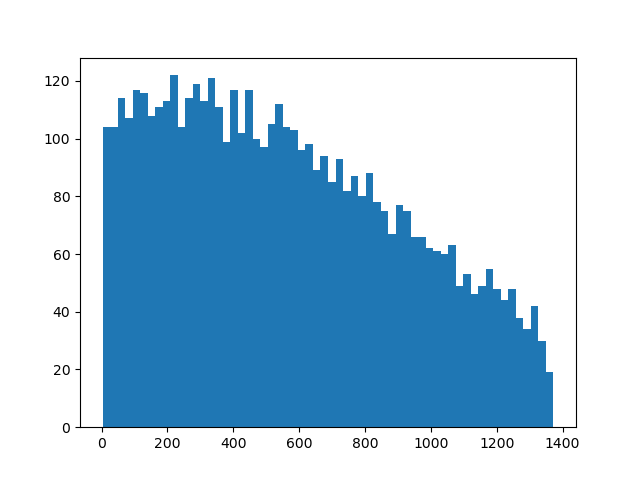

In [153]:
%matplotlib notebook
arrivalTimes = []
for i in dfPulsesFiltered["arrivalTimes"]:
    arrivalTimes.extend(i)

nBinsFit = int(2*(len(arrivalTimes)**(2/5.0)))
# nBinsFit = 50

histData = plt.hist(arrivalTimes, bins = nBinsFit)
plt.show()

In [154]:
nBinsFit

60

# Model fitting
## Finding parameters of exponential distribution for relative times from first peak

In [155]:
import numpy as np
from scipy.optimize import curve_fit

def expDist(x, A, lamb):
    x = np.array(x)
    return A*np.exp((-1)*lamb*x)

In [156]:
histX = np.array(histData[1][:-1])
histY = np.array(histData[0])

In [161]:
fittingBoundsAmp = (1000, 100000)
fittingBoundsLam = (1e-6, 5.00)

In [162]:
#Using least-squares method
popt, pcov = curve_fit(expDist, histX, histY, bounds = ((fittingBoundsAmp[0], fittingBoundsLam[0]),(fittingBoundsAmp[1], fittingBoundsLam[1])))

distAmp, distLambda = popt

In [163]:
distAmp

50416.706112814114

In [164]:
distLambda

2.061228990162061

<IPython.core.display.Javascript object>


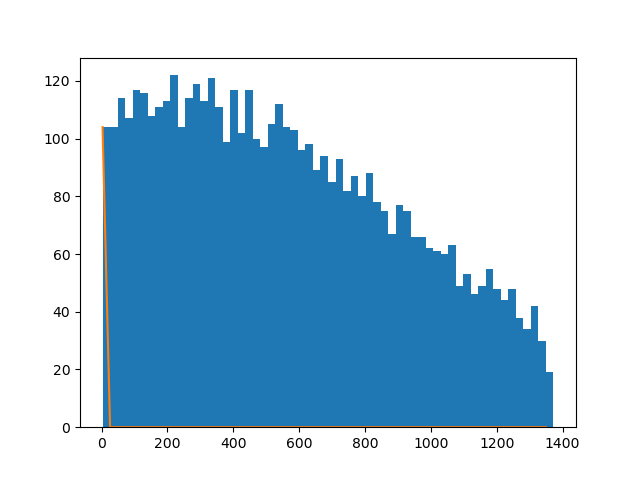

In [165]:
%matplotlib notebook

fitX = histX
fitY = expDist(fitX, distAmp, distLambda)

plt.hist(arrivalTimes, bins = nBinsFit)
plt.plot(fitX, fitY)
plt.show()

In [35]:
len(arrivalTimes)

955110

In [36]:
a = 0
for i in arrivalTimes:
    if (i < 219 and i > 216):
        a += 1

In [37]:
a

2579

## Finding parameters of exponential distribution for time between succesive peaks (Poisson)

<IPython.core.display.Javascript object>


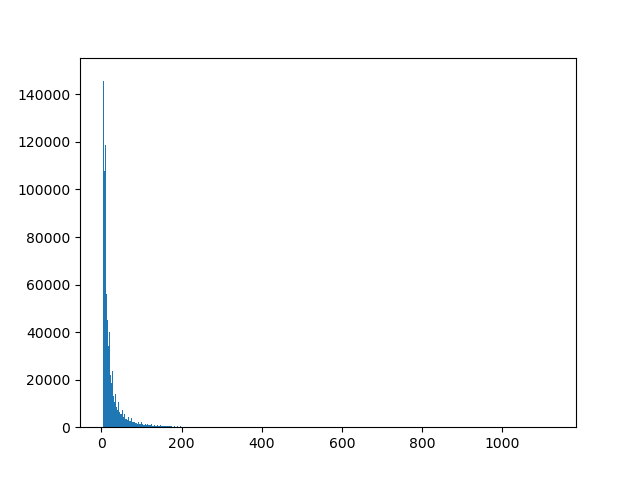

In [38]:
%matplotlib notebook
betweenPulsesTimes = []
for i in dfPulsesFiltered["timeBetweenPeaks"]:
    betweenPulsesTimes.extend(i)

nBinsFit = int(2*(len(betweenPulsesTimes)**(2/5.0)))
    
histData = plt.hist(betweenPulsesTimes, bins = nBinsFit)
plt.show()

In [124]:
import numpy as np
from scipy.optimize import curve_fit

def expDistOffSet(x, A, lamb, offset):
    x = np.array(x)
    return A*np.exp((-1)*lamb*(x-offset))

In [125]:
histX = np.array(histData[1][:-1])
histY = np.array(histData[0])

In [126]:
fittingBoundsAmp = (10000, 500000)
fittingBoundsLam = (1e-6, 1.00)
fittingBoundsOff = (-100, +100)

In [127]:
#Using least-squares method
popt, pcov = curve_fit(expDistOffSet, histX, histY, bounds = ((fittingBoundsAmp[0], fittingBoundsLam[0], fittingBoundsOff[0]),(fittingBoundsAmp[1], fittingBoundsLam[1], fittingBoundsOff[1])))

distAmp, distLambda, distOff = popt

In [128]:
distAmp

251390.80810058207

In [129]:
distLambda

0.09211613587179024

In [130]:
distOff

-1.72845062043763

<IPython.core.display.Javascript object>


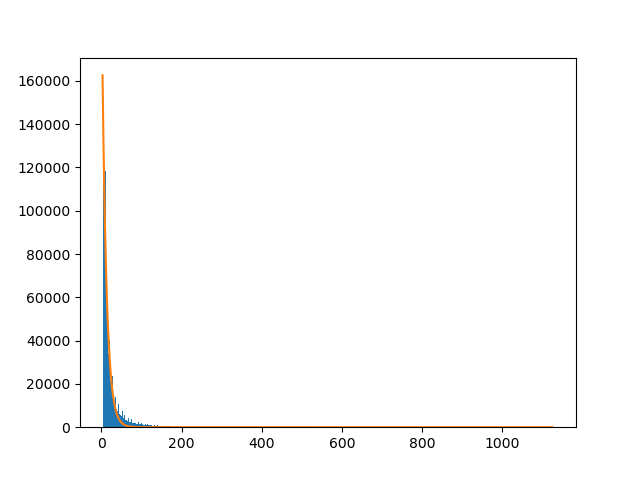

In [131]:
%matplotlib notebook

fitX = histX
fitY = expDistOffSet(fitX, distAmp, distLambda, distOff)

plt.hist(betweenPulsesTimes, bins = nBinsFit)
plt.plot(fitX, fitY)
plt.show()

<IPython.core.display.Javascript object>


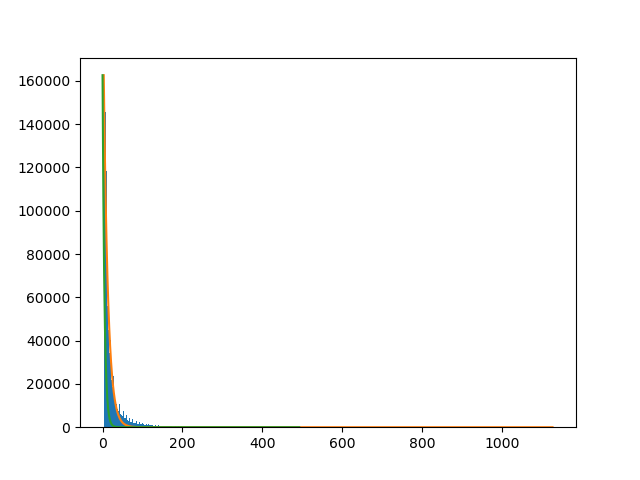

In [133]:
%matplotlib notebook

fitX = histX
fitY = expDistOffSet(fitX, distAmp, distLambda, distOff)
fitYNoOffset = expDistOffSet(fitX, distAmp, distLambda, -1.72845062043763)


plt.hist(betweenPulsesTimes, bins = nBinsFit)
plt.plot(fitX, fitY, fitYNoOffset)
plt.show()